# Related to figure 4e

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir('/data/yuchen_data/Stereo_seq/All_Figures/Figure4/1.data/1.panelE')

In [2]:
dic_color = dict(zip(['B', 'T', 'Plasma', 'Myeloid', 'Endothelial', 'Fibroblast', 'Hepatocyte', 'Tumor', 'pDC'], ['#008000','#cac0e7','#ED8A3F','#6a60a9','#1f78b4','#df65b0','#efe9ce', '#ff0000', '#756bb1']  ))

df_try_value = pd.read_csv('Try_metabolism.diff.txt', sep='\t')
df_try_value

,Deviating,Mature,diff
B,-0.024727,-0.038896,0.014169
T,-0.020595,-0.039022,0.018427
Myeloid,-0.035742,-0.038644,0.002902
Endothelial,-0.027712,-0.051488,0.023776
Fibroblast,-0.017245,-0.049050,0.031805
Tumor,0.013767,-0.031115,0.044881


In [3]:
# hypergeometric test
target_genes = ['AADAT','ACMSD','AFMID','HAAO','IDO1','IDO2','KMO','KYAT1','KYNU','TDO2','ATP7A','GCDH','ACE2','SLC36A4','SLC3A2','SLC7A5','SLC7A8','AANAT','ACAT1','ACAT2','ALDH1B1','ALDH2','ALDH3A2','ALDH7A1','ALDH9A1','AOC1','AOX1','ASMT','CAT','CYP1A1','CYP1A2','CYP1B1','DDC','ECHS1','EHHADH','HADH','HADHA','IL4I1','INMT','MAOA','MAOB','OGDH','OGDHL','TPH1','TPH2','WARS1','WARS2','KYAT3','ALDH1A1','ALDH1A2','CYP19A1','CYP2A13','CYP2C18','CYP2E1','CYP2F1','CYP2J2','CYP3A4','CYP4F12','CYP7B1','DHCR24','HSD17B10','PRMT1','SLC6A19','CLTRN','SLC16A10','SLC15A1','SLC15A2','SLC1A5','SLC7A11','SLC6A14','SLC1A4','SLC6A9','SLC38A2','SLC7A1']

dic = {}
for ct in df_try_value.index:
    df_de = pd.read_csv(f'DEG.{ct}.txt', index_col=0, sep='\t')
    df_de = df_de[(df_de['p_val']<0.05) & (df_de['cluster']=='NotMature')]
    degenes = df_de.index
    overlap_genes = set(degenes) & set(target_genes)
    p = stats.hypergeom.pmf(len(overlap_genes), 31344, len(target_genes), len(degenes))
    dic[ct] = (len(overlap_genes), p)

dic

{'B': (11, 9.093948344386208e-08),
 'T': (10, 4.3201952083459854e-07),
 'Myeloid': (7, 0.0002837283851742512),
 'Endothelial': (12, 1.6097427330253516e-08),
 'Fibroblast': (10, 3.0174036115281276e-10),
 'Tumor': (20, 4.754567795155847e-13)}

In [4]:
df_plot = pd.DataFrame(df_try_value['diff'].values, index=df_try_value.index, columns=['Diff.Tryptophan'])
df_plot['No.genes'] = [x[0] for x in df_plot.index.map(dic)]
df_plot['-log10p'] = [-np.log10(x[1]) for x in df_plot.index.map(dic)]

df_plot['group'] = df_plot.index
df_plot.sort_values('Diff.Tryptophan', ascending=False, inplace=True)
df_plot['plot_idx'] = range(df_plot.shape[0])

df_plot

,Diff.Tryptophan,No.genes,-log10p,group,plot_idx
Tumor,0.044881,20,12.322889,Tumor,0
Fibroblast,0.031805,10,9.520367,Fibroblast,1
Endothelial,0.023776,12,7.793244,Endothelial,2
T,0.018427,10,6.364497,T,3
B,0.014169,11,7.041248,B,4
Myeloid,0.002902,7,3.547097,Myeloid,5


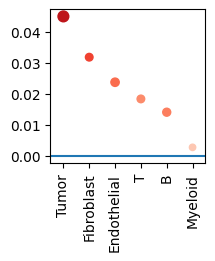

In [12]:
# plt.figure(figsize=(2, 2))
# ax = sns.scatterplot(data=df_plot, x='No.genes', y='Diff.Tryptophan', size='-log10p', hue='group', palette=dic_color, legend=True)
# plt.savefig('fig8.scatterplot.legend.v2.pdf', bbox_inches='tight')

# plt.figure(figsize=(2, 2))
# ax = sns.scatterplot(data=df_plot, x='No.genes', y='Diff.Tryptophan', size='-log10p', hue='group', palette=dic_color, legend=False)
# plt.savefig('fig8.scatterplot.nolegend.v2.pdf', bbox_inches='tight')

from mycolorpy import colorlist as mcp
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = mcp.gen_color(cmap="Reds",n=20)[4:16]
my_cmap = LinearSegmentedColormap.from_list("mycmap", colors)

fig, ax = plt.subplots(figsize=(2, 2))
ax.scatter(x=df_plot['plot_idx'], y=df_plot['Diff.Tryptophan'], c=df_plot['-log10p'], s=df_plot['No.genes']*3, cmap=my_cmap)
ax.set_xticks(df_plot['plot_idx'], df_plot['group'], rotation=90)
plt.hlines(0, -0.5, 5.5)
ax.set_xlim(-0.5, 5.5)
# sns.scatterplot(data=df_plot, x='plot_idx', y='Diff.Tryptophan', size='No.genes', hue='group', palette=dic_color, legend=True)
plt.show()